# ANOVA (분산분석) : 세 맛집 프로그램의 영향력 차이가 있는지 검정

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('raw_data/2017.csv')

In [3]:
df.head()

,방송,식당,방영일,포스팅일,제목,포스팅주소,days_diff,방영전,방영후
0,생생정보통,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,0,1
1,생생정보통,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,0,1
2,생생정보통,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,1,0
3,생생정보통,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,0,1
4,생생정보통,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,0,1


### ANOVA 분석을 위한 데이터 전처리 ( X : 방송명, Y : 방영 후 포스팅 증가수)

In [4]:
anova = pd.DataFrame(df.groupby(['식당', '방송'])['방영전', '방영후'].sum()).reset_index()

In [5]:
anova.head()

,식당,방송,방영전,방영후
0,136생고기,생생정보통,18,72
1,갈비구락부,생생정보통,66,69
2,갓포치유,수요미식회,41,109
3,강릉감자옹심이,수요미식회,268,422
4,강릉아구찜,생생정보통,90,165


In [6]:
anova['증가'] = anova['방영후'] - anova['방영전']

In [7]:
anova.head()

,식당,방송,방영전,방영후,증가
0,136생고기,생생정보통,18,72,54
1,갈비구락부,생생정보통,66,69,3
2,갓포치유,수요미식회,41,109,68
3,강릉감자옹심이,수요미식회,268,422,154
4,강릉아구찜,생생정보통,90,165,75


In [8]:
anova['증가'].groupby(anova['방송']).describe()

,count,mean,std,min,25%,50%,75%,max
방송,,,,,,,,
맛있는녀석들,79.0,38.405063,76.783164,-94.0,4.5,22.0,57.5,330.0
생생정보통,83.0,35.746988,47.616569,-83.0,17.0,31.0,48.5,300.0
수요미식회,84.0,102.714286,64.275868,-20.0,64.0,94.0,131.0,319.0


In [9]:
anova_mat = anova.loc[anova['방송']=='맛있는녀석들']

In [10]:
anova_mat.sort_values(by=['증가']).head(10)

,식당,방송,방영전,방영후,증가
142,시오,맛있는녀석들,547,453,-94
92,바다회사랑,맛있는녀석들,509,421,-88
63,두메향기 산,맛있는녀석들,207,138,-69
153,야바이,맛있는녀석들,530,470,-60
232,한량,맛있는녀석들,529,471,-58
78,먹깨비,맛있는녀석들,526,474,-52
85,무등산,맛있는녀석들,524,476,-48
117,샘밭막국수,맛있는녀석들,220,174,-46
61,동명항게찜,맛있는녀석들,257,223,-34
223,팔팔민물장어,맛있는녀석들,135,101,-34


In [11]:
anova.to_csv('2017_anova.csv', index=False)

## 가정 check!

### 1. 정규성 검정

1) 히스토그램

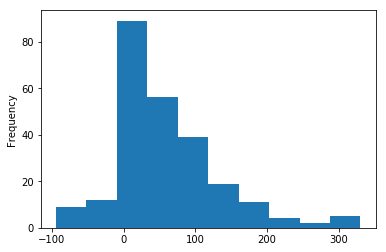

In [12]:
anova['증가'].plot(kind = 'hist')

2) Shapiro–Wilk test
[Shapiro–Wilk test]"https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test"

In [13]:
stats.shapiro(anova['증가'][anova['방송'] == '맛있는녀석들'])

(0.8565592169761658, 3.0981419740783167e-07)

In [14]:
stats.shapiro(anova['증가'][anova['방송'] == '생생정보통'])

(0.7749148011207581, 6.116906980935255e-10)

In [15]:
stats.shapiro(anova['증가'][anova['방송'] == '수요미식회'])

(0.9517372250556946, 0.0032664097379893064)

모두 정규성에 위배됨.......

3) probplot

((array([-2.37663702, -2.02958204, -1.82767017, -1.68081377, -1.5632274 ,
         -1.46398099, -1.37736584, -1.30000518, -1.22972736, -1.16504879,
         -1.10490843, -1.04851956, -0.99528161, -0.94472489, -0.89647454,
         -0.8502261 , -0.80572849, -0.76277189, -0.72117887, -0.68079772,
         -0.64149747, -0.60316407, -0.5656973 , -0.52900844, -0.49301835,
         -0.45765594, -0.4228569 , -0.38856265, -0.35471952, -0.32127797,
         -0.288192  , -0.25541861, -0.22291736, -0.19064996, -0.15857989,
         -0.12667214, -0.09489286, -0.06320916, -0.0315888 ,  0.        ,
          0.0315888 ,  0.06320916,  0.09489286,  0.12667214,  0.15857989,
          0.19064996,  0.22291736,  0.25541861,  0.288192  ,  0.32127797,
          0.35471952,  0.38856265,  0.4228569 ,  0.45765594,  0.49301835,
          0.52900844,  0.5656973 ,  0.60316407,  0.64149747,  0.68079772,
          0.72117887,  0.76277189,  0.80572849,  0.8502261 ,  0.89647454,
          0.94472489,  0.99528161,  1.

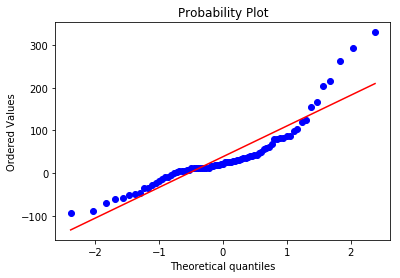

In [16]:
stats.probplot(anova['증가'][anova['방송'] == '맛있는녀석들'], plot= plt)

((array([-2.39472592, -2.04999764, -1.84970871, -1.70418555, -1.58777462,
         -1.48960474, -1.40399923, -1.32760098, -1.25825142, -1.19447624,
         -1.13522129, -1.07970516, -1.02733153, -0.97763423, -0.93024133,
         -0.88485094, -0.84121426, -0.79912351, -0.75840314, -0.7189032 ,
         -0.68049443, -0.64306437, -0.60651441, -0.57075741, -0.5357158 ,
         -0.5013201 , -0.46750761, -0.43422146, -0.40140969, -0.36902459,
         -0.33702204, -0.30536107, -0.27400335, -0.24291282, -0.2120554 ,
         -0.18139862, -0.15091143, -0.1205639 , -0.09032702, -0.06017252,
         -0.03007265,  0.        ,  0.03007265,  0.06017252,  0.09032702,
          0.1205639 ,  0.15091143,  0.18139862,  0.2120554 ,  0.24291282,
          0.27400335,  0.30536107,  0.33702204,  0.36902459,  0.40140969,
          0.43422146,  0.46750761,  0.5013201 ,  0.5357158 ,  0.57075741,
          0.60651441,  0.64306437,  0.68049443,  0.7189032 ,  0.75840314,
          0.79912351,  0.84121426,  0.

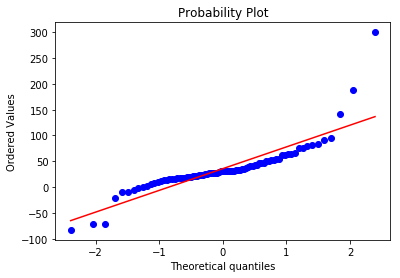

In [17]:
stats.probplot(anova['증가'][anova['방송'] == '생생정보통'], plot= plt)

((array([-2.39909612, -2.05492542, -1.85502454, -1.70981961, -1.59368882,
         -1.49577514, -1.41040959, -1.33423977, -1.26511027, -1.20154899,
         -1.14250341, -1.08719341, -1.03502367, -0.98552885, -0.93833772,
         -0.89314898, -0.84971437, -0.80782658, -0.76731049, -0.72801656,
         -0.68981591, -0.65259645, -0.61625992, -0.58071952, -0.54589805,
         -0.51172637, -0.47814214, -0.44508884, -0.41251489, -0.38037296,
         -0.34861935, -0.3172135 , -0.28611751, -0.25529581, -0.2247148 ,
         -0.19434256, -0.16414858, -0.13410355, -0.10417912, -0.07434771,
         -0.04458233, -0.0148564 ,  0.0148564 ,  0.04458233,  0.07434771,
          0.10417912,  0.13410355,  0.16414858,  0.19434256,  0.2247148 ,
          0.25529581,  0.28611751,  0.3172135 ,  0.34861935,  0.38037296,
          0.41251489,  0.44508884,  0.47814214,  0.51172637,  0.54589805,
          0.58071952,  0.61625992,  0.65259645,  0.68981591,  0.72801656,
          0.76731049,  0.80782658,  0.

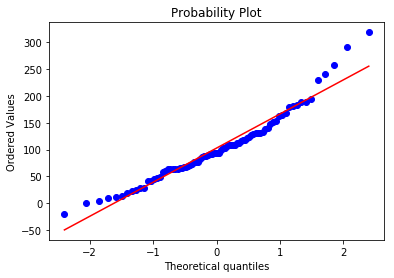

In [18]:
stats.probplot(anova['증가'][anova['방송'] == '수요미식회'], plot= plt)

흠....
일단 데이터의 수가 크니 정규분포를 따른다고 가정하고 넘어가자

### 2. 등분산 검정

In [19]:
stats.levene(anova['증가'][anova['방송'] == '맛있는녀석들'], 
             anova['증가'][anova['방송'] == '생생정보통'],
             anova['증가'][anova['방송'] == '수요미식회'])

LeveneResult(statistic=5.285062050926835, pvalue=0.0056655898887976956)

등분산도..

## ANOVA

In [20]:
stats.f_oneway(anova['증가'][anova['방송'] == '맛있는녀석들'], 
             anova['증가'][anova['방송'] == '생생정보통'],
             anova['증가'][anova['방송'] == '수요미식회'])

F_onewayResult(statistic=29.3524808800231, pvalue=3.818512884010948e-12)

**p-value < 0.05 이므로 귀무가설(세 프로그램의 방영전후 포스팅 차이의 평균이 같다)이 기각됨.
즉, 적어도 하나의 프로그램의 방영전후 포스팅 차이의 평균이 다르다고 결론낼 수 있음
평균 차이가 있는 프로그램을 알아보려면 사후검정을 해야됨**

## 사후검정 : Tukey's HSD Post-hoc comparison

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [22]:
mc = MultiComparison(anova['증가'], anova['방송'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
맛있는녀석들 생생정보통  -2.6581  -26.3027 20.9865 False 
맛있는녀석들 수요미식회  64.3092  40.7334  87.8851  True 
생생정보통  수요미식회  66.9673   43.686  90.2486  True 
----------------------------------------------


**맛있는 녀석들과 생생정보통의 방영후 포스팅 증가 개수의 평균은 다르다고 할 수 없지만, 
(맛있는 녀석들, 수요미식회), (생생정보통, 수요미식회)는 평균 차이가 있다고 할 수 있음**